In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import rdkit
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
RESULT_PATH = "/home/sdl/SDL-LNP/model/4CR-1920.csv"

MAPPING_PATH = "/home/sdl/SDL-LNP/model/data_process/220k_library.csv"


NAME_SMI_PATH = "/home/sdl/SDL-LNP/mapping_table/General_mapping_sampler.csv"


df = pd.read_csv(RESULT_PATH)
mapping_df = pd.read_csv(MAPPING_PATH)
name_smi_df = pd.read_csv(NAME_SMI_PATH)

In [4]:
# change RLU (log2)	to pred_result
# change mol to smi_name
# drop Markush code

df = df.rename(columns={"RLU (log2)": "pred_result"})
df = df.rename(columns={"mol": "smi_name"})
# df = df.drop(columns=["Markush code"])

In [5]:
df

,pred_result,smi_name,Markush code
0,5.612732,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(...,"(R3(1):01, R2(4):01, R1(6):01, R4(9):01)"
1,1.038637,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(...,"(R3(1):01, R2(4):01, R1(6):01, R4(9):02)"
2,1.899728,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(...,"(R3(1):01, R2(4):01, R1(6):01, R4(9):03)"
3,2.307012,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(...,"(R3(1):01, R2(4):01, R1(6):01, R4(9):04)"
4,1.088917,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(...,"(R3(1):01, R2(4):01, R1(6):01, R4(9):05)"
...,...,...,...
1915,1.231326,CCCCCCCCC(CCCCCC)C(=O)OCCCCCN(C(C1CCNCC1)C(=O)...,"(R3(1):04, R2(4):04, R1(6):20, R4(9):02)"
1916,3.380320,CCCCCCCCC(CCCCCC)C(=O)OCCCCCN(C(C1CCNCC1)C(=O)...,"(R3(1):04, R2(4):04, R1(6):20, R4(9):03)"
1917,9.850832,CCCCCCCCC(CCCCCC)C(=O)OCCCCCN(C(C1CCNCC1)C(=O)...,"(R3(1):04, R2(4):04, R1(6):20, R4(9):04)"
1918,9.236222,CCCCCCCCC(CCCCCC)C(=O)OCCCCCN(C(C1CCNCC1)C(=O)...,"(R3(1):04, R2(4):04, R1(6):20, R4(9):05)"


In [6]:
# expand the Markush code: (R3(1):01, R2(4):01, R1(6):01, R4(9):01)
# to R3:01, R2:01, R1:01, R4:01
# add new columns to the df: R1, R2, R3, R4
def expand_markush_code(row):
    markush_code = row["Markush code"]
    markush_code = markush_code.replace("(", "")
    markush_code = markush_code.replace(")", "")
    markush_code = markush_code.split(",")
    for code in markush_code:
        code = code.split(":")
        code[0] = code[0].strip()[:2]
        row[code[0]] = code[1]
        # print(code[0], code[1])
    return row

df = df.apply(expand_markush_code, axis=1)

In [7]:
df

,pred_result,smi_name,Markush code,R3,R2,R1,R4
0,5.612732,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(...,"(R3(1):01, R2(4):01, R1(6):01, R4(9):01)",01,01,01,01
1,1.038637,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(...,"(R3(1):01, R2(4):01, R1(6):01, R4(9):02)",01,01,01,02
2,1.899728,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(...,"(R3(1):01, R2(4):01, R1(6):01, R4(9):03)",01,01,01,03
3,2.307012,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(...,"(R3(1):01, R2(4):01, R1(6):01, R4(9):04)",01,01,01,04
4,1.088917,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(...,"(R3(1):01, R2(4):01, R1(6):01, R4(9):05)",01,01,01,05
...,...,...,...,...,...,...,...
1915,1.231326,CCCCCCCCC(CCCCCC)C(=O)OCCCCCN(C(C1CCNCC1)C(=O)...,"(R3(1):04, R2(4):04, R1(6):20, R4(9):02)",04,04,20,02
1916,3.380320,CCCCCCCCC(CCCCCC)C(=O)OCCCCCN(C(C1CCNCC1)C(=O)...,"(R3(1):04, R2(4):04, R1(6):20, R4(9):03)",04,04,20,03
1917,9.850832,CCCCCCCCC(CCCCCC)C(=O)OCCCCCN(C(C1CCNCC1)C(=O)...,"(R3(1):04, R2(4):04, R1(6):20, R4(9):04)",04,04,20,04
1918,9.236222,CCCCCCCCC(CCCCCC)C(=O)OCCCCCN(C(C1CCNCC1)C(=O)...,"(R3(1):04, R2(4):04, R1(6):20, R4(9):05)",04,04,20,05


In [8]:
# get the count for each smi_name
count = df['smi_name'].value_counts() 
count

smi_name
CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(=O)NC1CCCCC1                                                1
CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(=O)NC(C)(C)CC(C)(C)C                                        1
CCCCCCCCCCCC(=O)OCCCCCN(C(CCCN(CCCC)CCCC)C(=O)NCC(=O)OC)C(=O)CCCCCCC\C=C/C\C=C/CCCCC                      1
CCCCCCCCCCCC(=O)OCCCCCN(C(CCCN(CCCC)CCCC)C(=O)NCCN1CCOCC1)C(=O)CCCCCCC\C=C/C\C=C/CCCCC                    1
CCCCCCCCCCCC(=O)OCCCCCN(C(CCCN(CCCC)CCCC)C(=O)NC(C)(C)C)C(=O)CCCCCCC\C=C/C\C=C/CCCCC                      1
                                                                                                         ..
CCCCCCCC\C=C/CCCCCCCN(C(N1CCCCC1)C(=O)NC12C[C@H]3C[C@H](C[C@H](C3)C1)C2)C(=O)CCCCCCC\C=C/CCCCCCCC         1
CCCCCCCC\C=C/CCCCCCCN(C(N1CCCCC1)C(=O)NCC(=O)OC)C(=O)CCCCCCC\C=C/CCCCCCCC                                 1
CCCCCCCC\C=C/CCCCCCCN(C(N1CCCCC1)C(=O)NCCN1CCOCC1)C(=O)CCCCCCC\C=C/CCCCCCCC                               1
CCCCCCCC\C=C/CCCCCC

## Prep

In [9]:
sns.set(style="whitegrid")

## Reduction of each molecules

In [10]:
# mean_reduce of smi_name
# mapping_df = df.groupby('smi_name').mean()

In [11]:
df

,pred_result,smi_name,Markush code,R3,R2,R1,R4
0,5.612732,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(...,"(R3(1):01, R2(4):01, R1(6):01, R4(9):01)",01,01,01,01
1,1.038637,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(...,"(R3(1):01, R2(4):01, R1(6):01, R4(9):02)",01,01,01,02
2,1.899728,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(...,"(R3(1):01, R2(4):01, R1(6):01, R4(9):03)",01,01,01,03
3,2.307012,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(...,"(R3(1):01, R2(4):01, R1(6):01, R4(9):04)",01,01,01,04
4,1.088917,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCN(C)C)C(...,"(R3(1):01, R2(4):01, R1(6):01, R4(9):05)",01,01,01,05
...,...,...,...,...,...,...,...
1915,1.231326,CCCCCCCCC(CCCCCC)C(=O)OCCCCCN(C(C1CCNCC1)C(=O)...,"(R3(1):04, R2(4):04, R1(6):20, R4(9):02)",04,04,20,02
1916,3.380320,CCCCCCCCC(CCCCCC)C(=O)OCCCCCN(C(C1CCNCC1)C(=O)...,"(R3(1):04, R2(4):04, R1(6):20, R4(9):03)",04,04,20,03
1917,9.850832,CCCCCCCCC(CCCCCC)C(=O)OCCCCCN(C(C1CCNCC1)C(=O)...,"(R3(1):04, R2(4):04, R1(6):20, R4(9):04)",04,04,20,04
1918,9.236222,CCCCCCCCC(CCCCCC)C(=O)OCCCCCN(C(C1CCNCC1)C(=O)...,"(R3(1):04, R2(4):04, R1(6):20, R4(9):05)",04,04,20,05


In [12]:
# conver smiles component back to name
df["A_name"] = df["R1"]
df["B_name"] = df["R2"]
df["C_name"] = df["R3"]
df["D_name"] = df["R4"]

# Ploting

<Axes: ylabel='pred_result'>

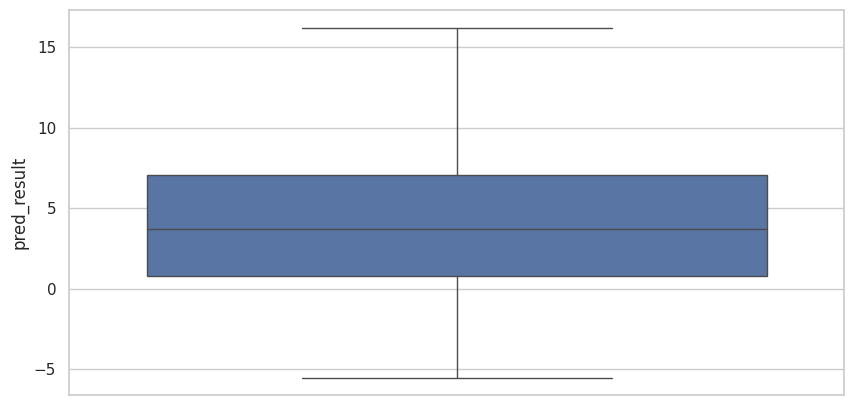

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(y="pred_result", data=df)

<Axes: xlabel='pred_result', ylabel='Density'>

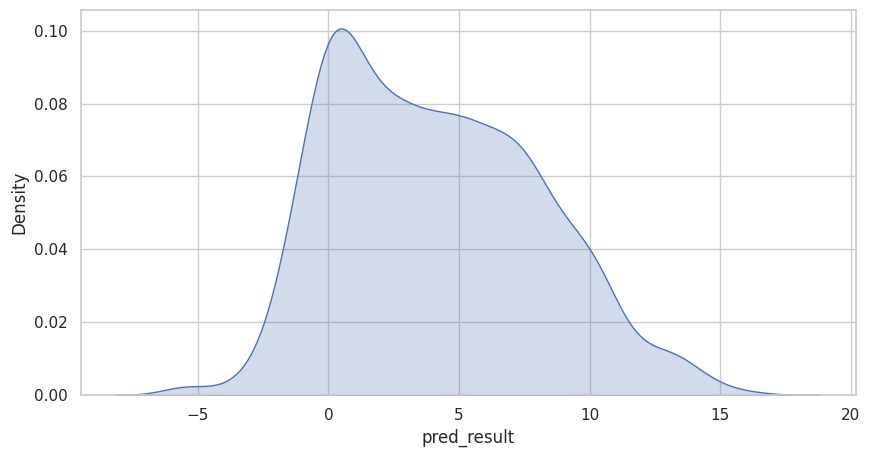

In [14]:
# density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['pred_result'], fill=True)

<Figure size 1000x500 with 0 Axes>

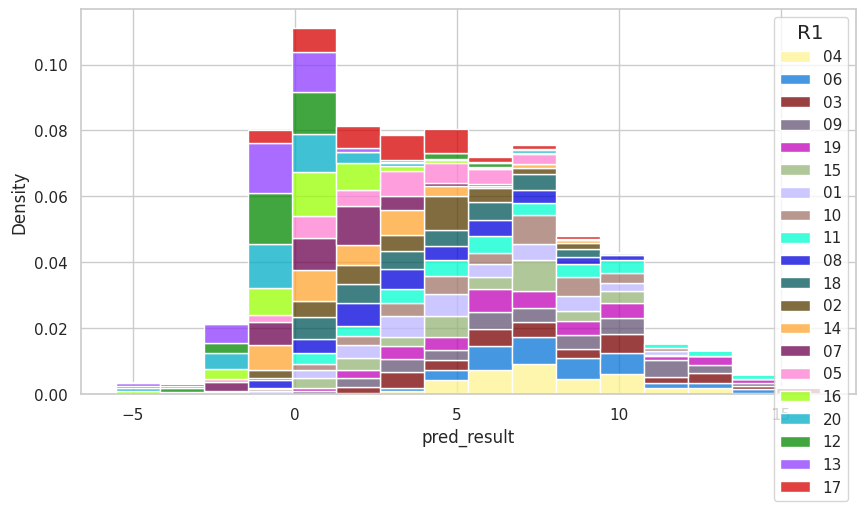

In [55]:
# plot stacked bins, stack by R1 names
plt.figure(figsize=(10, 5))
import colorcet as cc

    

# sns for stacked bins
plt.figure(figsize=(10, 5))
palette = sns.color_palette(cc.glasbey, n_colors=20)

sns.histplot(df, bins=16, kde=False, stat="density", multiple="stack", x="pred_result", hue="A_name", legend=True,element="bars", palette=palette

)


# add legend
plt.legend(title="R1", title_fontsize='large', loc='upper right', labels=df["A_name"].unique())

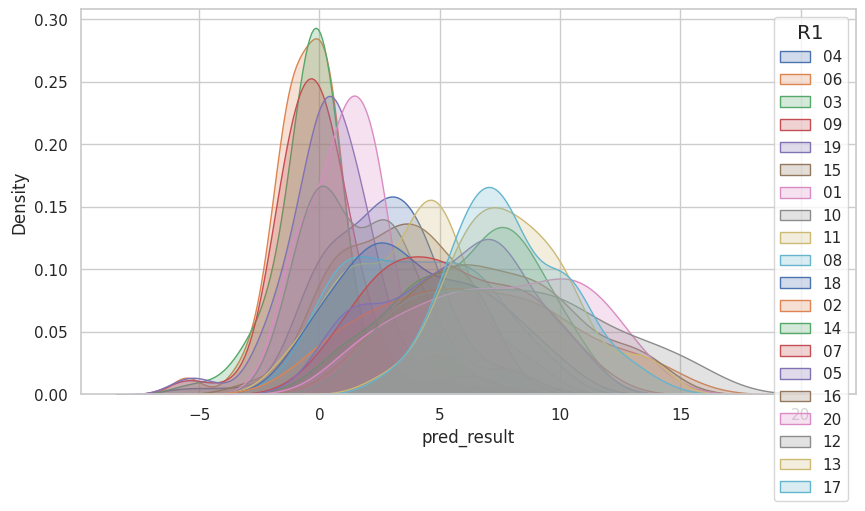

In [65]:
# plot density plot on a fixed scale for each R1
palette = sns.color_palette(cc.glasbey, n_colors=20)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

cat = "A"
for name in df[f"{cat}_name"].unique():
    sns.kdeplot(df[df[f"{cat}_name"] == name]["pred_result"], fill=True, ax=ax, label=name)
plt.legend(title="R1", title_fontsize='large', loc='upper right', labels=df[f"{cat}_name"].unique())

<Axes: ylabel='Density'>

<Figure size 1000x500 with 0 Axes>

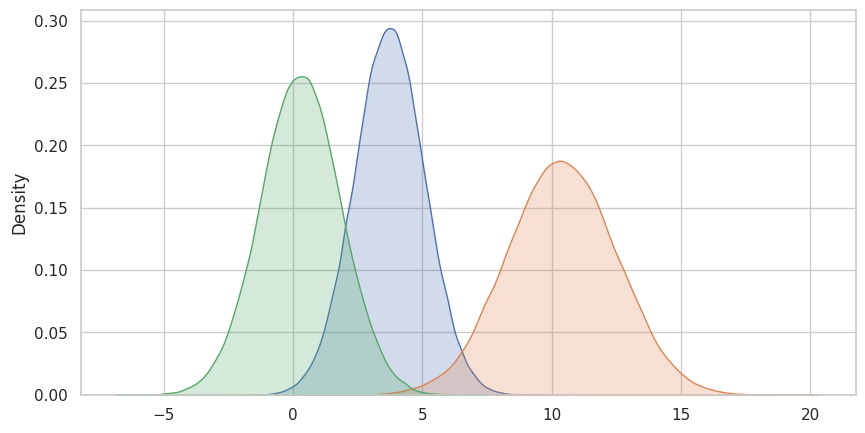

In [34]:
# split guassian mixture
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(df[['pred_result']])

# visualize the fited gmm
plt.figure(figsize=(10, 5))
gmm.means_
gmm.covariances_

# visualize multiple guassian
gaus_sample_1 = np.random.normal(gmm.means_[0], np.sqrt(gmm.covariances_[0][0]), 100000)
gaus_sample_2 = np.random.normal(gmm.means_[1], np.sqrt(gmm.covariances_[1][0]), 100000)
gaus_sample_3 = np.random.normal(gmm.means_[2], np.sqrt(gmm.covariances_[2][0]), 100000)

plt.figure(figsize=(10, 5))
sns.kdeplot(gaus_sample_1, fill=True)
sns.kdeplot(gaus_sample_2, fill=True)
sns.kdeplot(gaus_sample_3, fill=True)




# Inspect top performing molecules

In [221]:
top_10 = df.sort_values(by='pred_result', ascending=False).head(10)

In [222]:
top_10

,pred_result,smi_name,Markush code,R3,R2,R1,R4,A_name,B_name,C_name,D_name
546,16.217091,CCCCCCCCCN(C(C1CCN(C)CC1)C(=O)NC1CCCCC1)C(=O)C...,"(R3(1):02, R2(4):01, R1(6):12, R4(9):01)",02,01,12,01,12,01,02,01
67,16.217091,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(C1CCN(C)CC...,"(R3(1):01, R2(4):01, R1(6):12, R4(9):02)",01,01,12,02,12,01,01,02
71,15.371240,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(C1CCN(C)CC...,"(R3(1):01, R2(4):01, R1(6):12, R4(9):06)",01,01,12,06,12,01,01,06
426,15.052964,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCOC(=O)C(CCCCCC)CC...,"(R3(1):01, R2(4):04, R1(6):12, R4(9):01)",01,04,12,01,12,04,01,01
66,14.934269,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(C1CCN(C)CC...,"(R3(1):01, R2(4):01, R1(6):12, R4(9):01)",01,01,12,01,12,01,01,01
906,14.919730,CCCCCCCC\C=C/CCCCCCCC(=O)N(CCCCCOC(=O)C(CCCCCC...,"(R3(1):02, R2(4):04, R1(6):12, R4(9):01)",02,04,12,01,12,04,02,01
846,14.598672,CCCCCCCC\C=C/CCCCCCCC(=O)N(CCCCCOC(=O)C(CCCCCC...,"(R3(1):02, R2(4):04, R1(6):02, R4(9):01)",02,04,02,01,02,04,02,01
68,14.581192,CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(C1CCN(C)CC...,"(R3(1):01, R2(4):01, R1(6):12, R4(9):03)",01,01,12,03,12,01,01,03
666,14.402552,CCCCCCCC\C=C/CCCCCCCN(C(C1CCN(C)CC1)C(=O)NC1CC...,"(R3(1):02, R2(4):02, R1(6):12, R4(9):01)",02,02,12,01,12,02,02,01
486,14.393726,CCCCCCCCCN(C(CCCN(C)C)C(=O)NC1CCCCC1)C(=O)CCCC...,"(R3(1):02, R2(4):01, R1(6):02, R4(9):01)",02,01,02,01,02,01,02,01


<Axes: xlabel='A_name', ylabel='pred_result'>

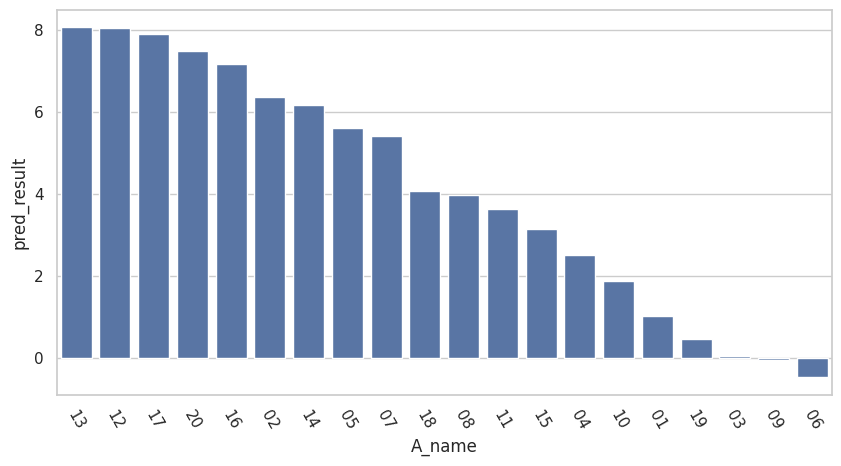

In [239]:
# plot result distribution of A molecules
A_ranking = df.groupby('A_name').mean().sort_values(by='pred_result', ascending=False)
A_ranking["A_name"] = A_ranking.index
plt.figure(figsize=(10, 5))
# using bar, make the label readable (tilt)
plt.xticks(rotation=-60)
# show standard deviation
sns.barplot(x=A_ranking["A_name"], y=A_ranking['pred_result'])



<Axes: xlabel='B_name', ylabel='pred_result'>

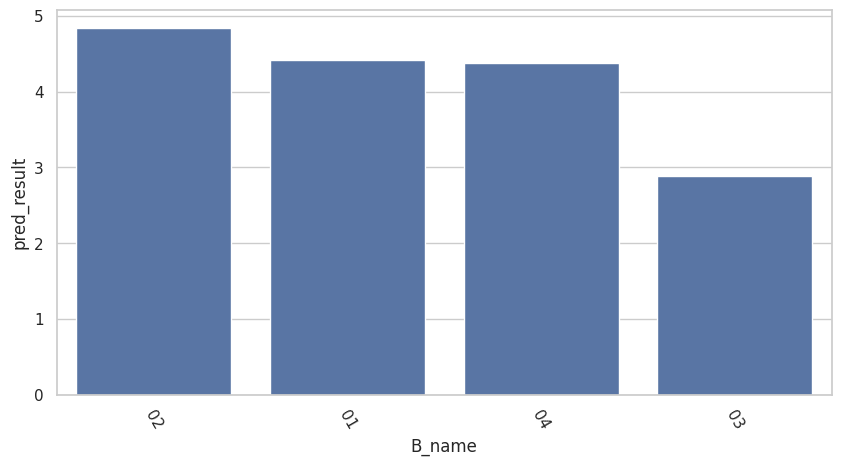

In [237]:
B_ranking = df.groupby('B_name').mean().sort_values(by='pred_result', ascending=False)
B_ranking["B_name"] = A_ranking.index
# plot result distribution of B molecules

plt.figure(figsize=(10, 5))
# using bar, make the label readable (tilt)?
plt.xticks(rotation=-60)
sns.barplot(x=B_ranking["B_name"], y=B_ranking['pred_result'])

<Axes: xlabel='C_name', ylabel='pred_result'>

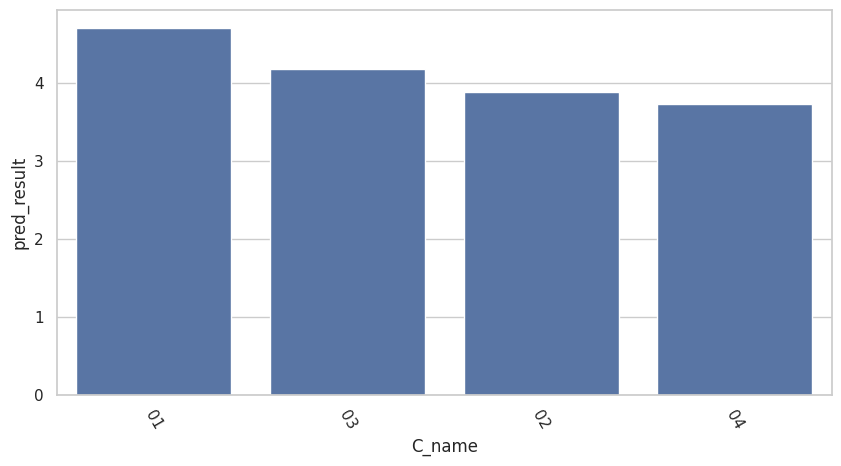

In [240]:
C_ranking = df.groupby('C_name').mean().sort_values(by='pred_result', ascending=False)
C_ranking["C_name"] = C_ranking.index
# plot result distribution of C molecules
plt.figure(figsize=(10, 5))
# using bar, make the label readable (tilt)?
plt.xticks(rotation=-60)
sns.barplot(x=C_ranking["C_name"], y=C_ranking['pred_result'])

<Axes: xlabel='D_name', ylabel='pred_result'>

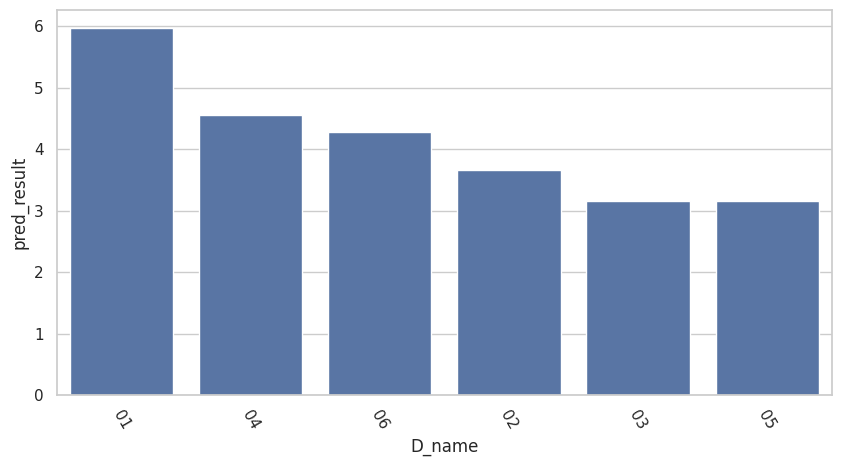

In [241]:
# plot result distribution of D molecules
D_ranking = df.groupby('D_name').mean().sort_values(by='pred_result', ascending=False)
D_ranking["D_name"] = D_ranking.index
plt.figure(figsize=(10, 5))
# using bar, make the label readable (tilt)?
plt.xticks(rotation=-60)
sns.barplot(x=D_ranking["D_name"], y=D_ranking['pred_result'])

In [242]:
# Example data
# plot_df = df[:10000]
# randomly sample 100000  data
plot_df = df

# convert plot_df A_name, B_name, C_name, D_name to int code
plot_df["A_code"] = plot_df["A_name"].astype('category').cat.codes
plot_df["B_code"] = plot_df["B_name"].astype('category').cat.codes
plot_df["C_code"] = plot_df["C_name"].astype('category').cat.codes
plot_df["D_code"] = plot_df["D_name"].astype('category').cat.codes

# Create figure
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = plot_df['pred_result'],
                    showscale = True,
                    colorscale = 'Electric',
                    ),
        dimensions = list([
            dict(
                label = 'A_code', 
                tickvals = plot_df["A_name"].astype('category').cat.codes.unique(),
                values = plot_df['A_code'].values,
                ticktext = plot_df["A_name"].astype('category').cat.categories.tolist()
                ),
            dict(
                label = 'B_code', 
                tickvals = plot_df["B_name"].astype('category').cat.codes.unique(),
                values = plot_df['B_code'].values,
                ticktext = plot_df["B_name"].astype('category').cat.categories.tolist()
                ),
            dict(
                label = 'C_code',
                tickvals = plot_df["C_name"].astype('category').cat.codes.unique(),
                values = plot_df['C_code'].values,
                ticktext = plot_df["C_name"].astype('category').cat.categories.tolist()
                ),
            dict(
                label = 'D_code', 
                tickvals = plot_df["D_name"].astype('category').cat.codes.unique(),
                values = plot_df['D_code'].values,
                ticktext = plot_df["D_name"].astype('category').cat.categories.tolist()
                ),
            dict(range = [plot_df['pred_result'].min()-1, plot_df['pred_result'].max()+1],
                label = 'pred_result', 
                values = plot_df['pred_result'])
        ]),
    )
)
        
        

fig.show()


<Figure size 1000x1000 with 0 Axes>

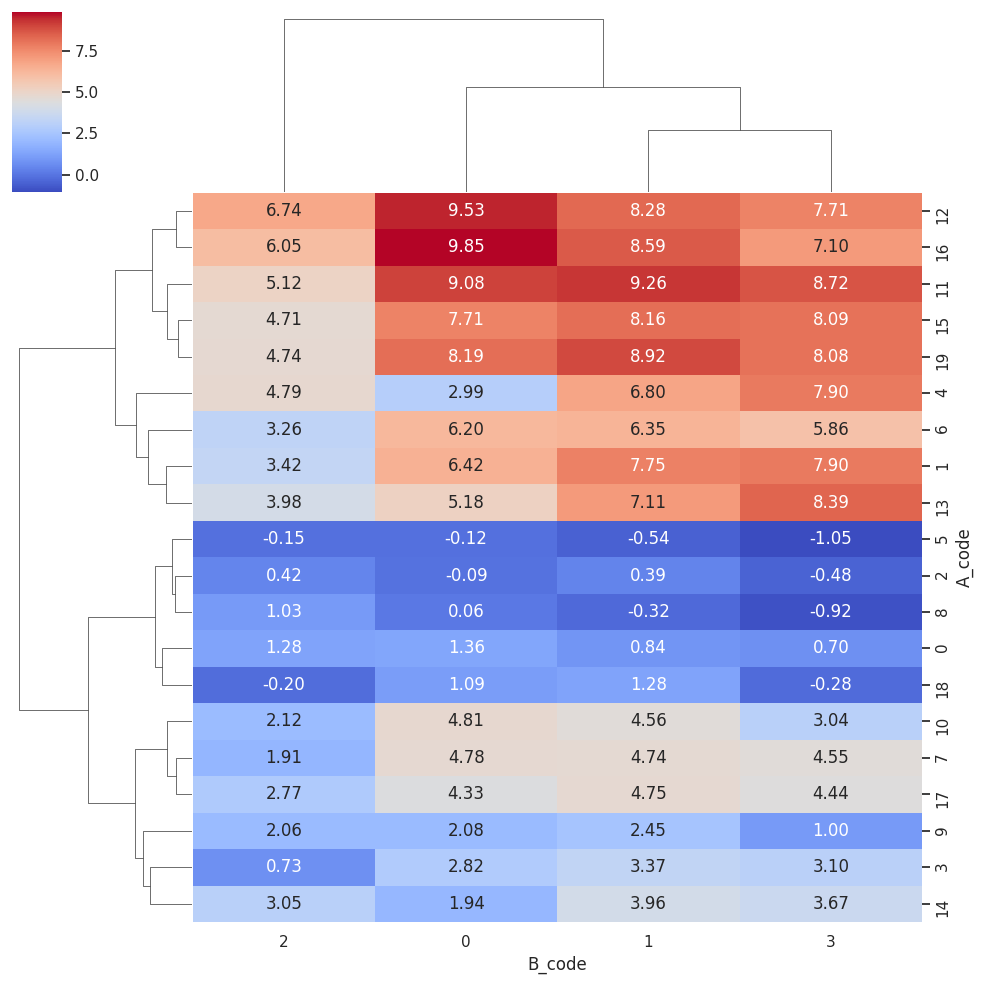

In [255]:
# make a matrix that compares the correlation between AxB, using mean or median reduction

def compute_matrix(class_A = "A", class_B = "B", method = "mean"):
    # filter out A and B molecules
    if method == "mean":
        AxB = df.groupby([f'{class_A}_code', f'{class_B}_code']).mean()
    elif method == "median":
        AxB = df.groupby([f'{class_A}_code', f'{class_B}_code']).median()
    elif method == "variation":
        AxB = df.groupby([f'{class_A}_code', f'{class_B}_code']).std()
    else:
        raise ValueError("method should be either mean, median, or variation")
    # convert AxB to matrix
    # only keep pred_result column
    AxB = AxB["pred_result"]
    AxB_matrix = AxB.unstack()
    return AxB_matrix

AxB_matrix = compute_matrix("A", "B", "mean")

# plot the matrix
plt.figure(figsize=(10, 10))
# sns.heatmap(AxB_matrix, annot=True, fmt=".2f", cmap='coolwarm')

sns.clustermap(AxB_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    

<Figure size 1000x1000 with 0 Axes>

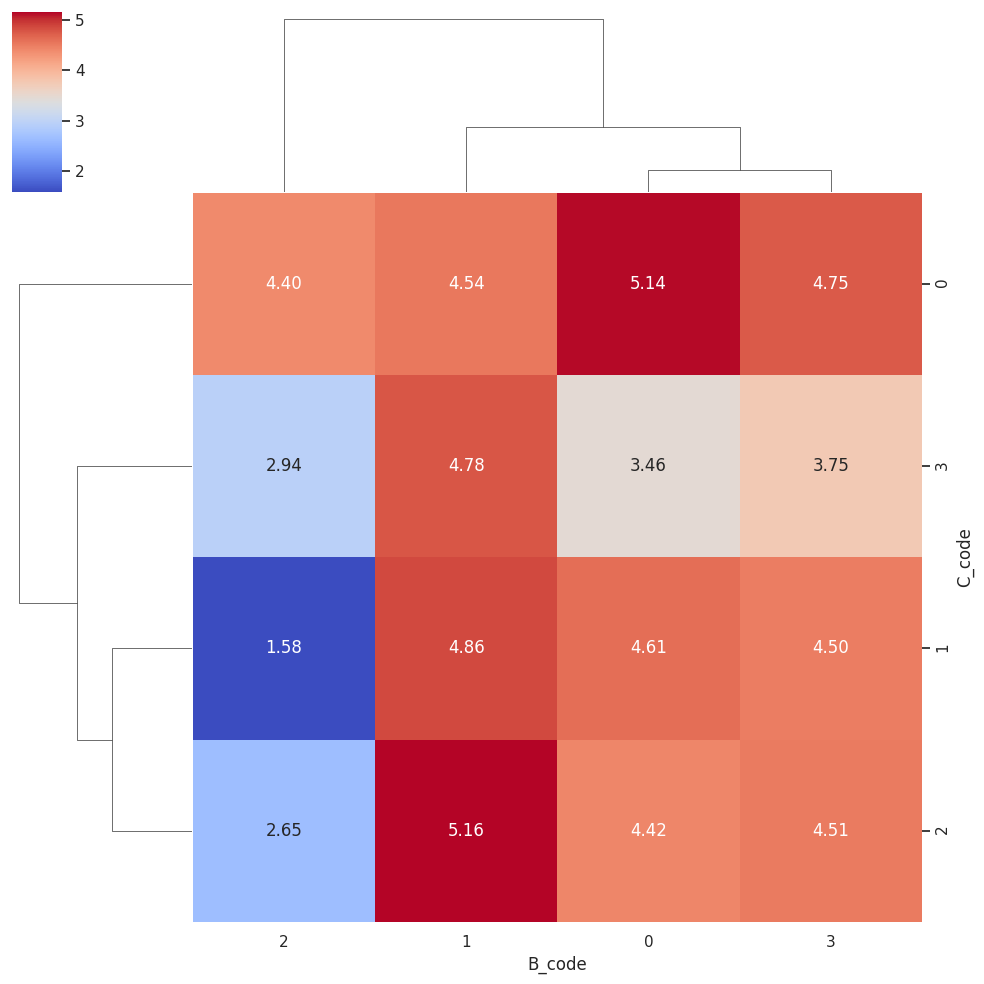

In [256]:
plt.figure(figsize=(10, 10))
sns.clustermap(compute_matrix("C", "B", "mean"), annot=True, fmt=".2f", cmap='coolwarm')

<Figure size 1000x1000 with 0 Axes>

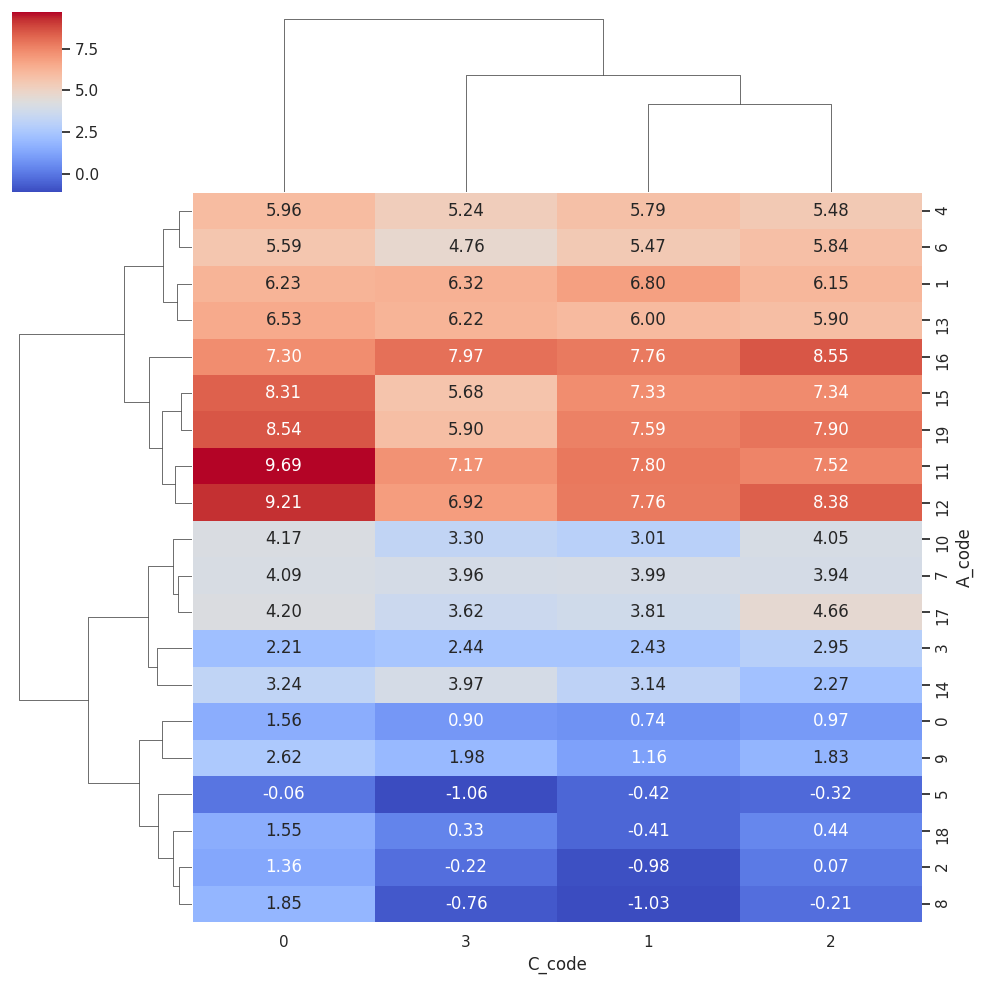

In [257]:
plt.figure(figsize=(10, 10))
sns.clustermap(compute_matrix("A", "C", "mean"), annot=True, fmt=".2f", cmap='coolwarm')

<Figure size 1000x1000 with 0 Axes>

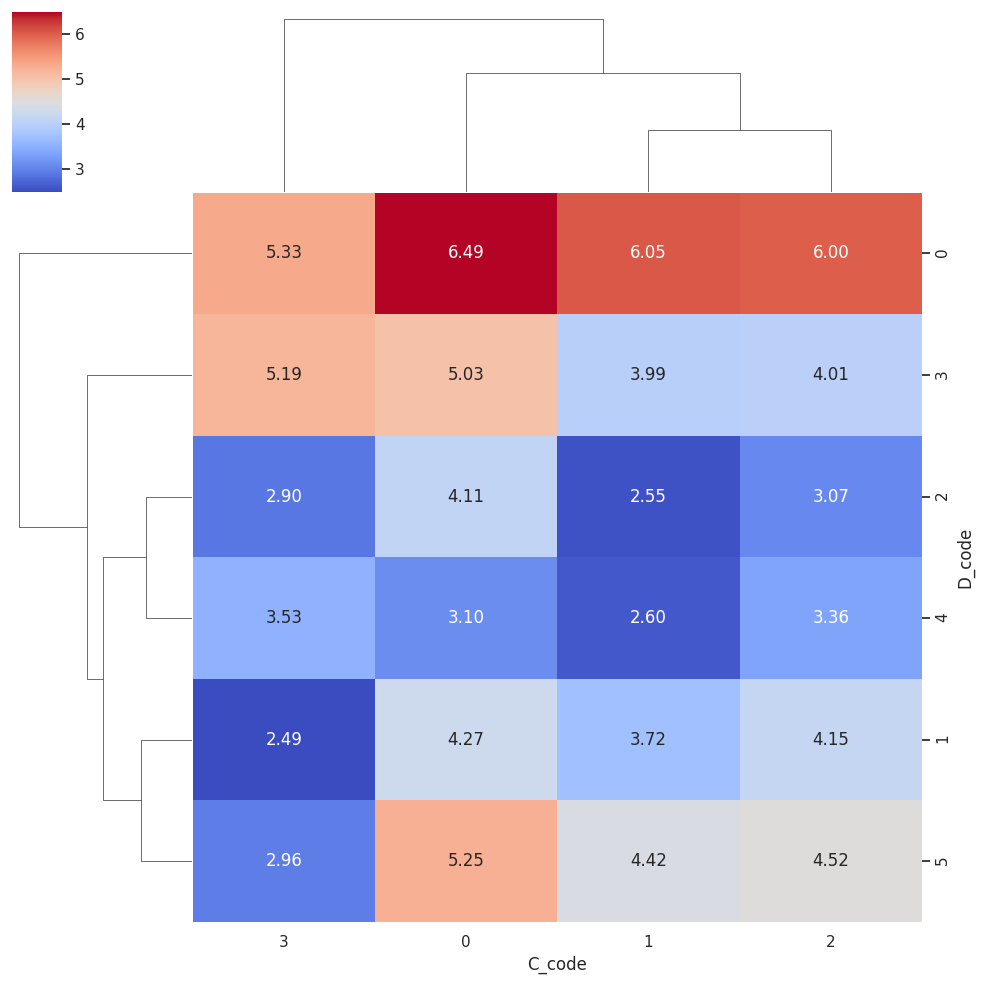

In [258]:
plt.figure(figsize=(10, 10))
sns.clustermap(compute_matrix("D", "C", "mean"), annot=True, fmt=".2f", cmap='coolwarm')

<Figure size 1000x1000 with 0 Axes>

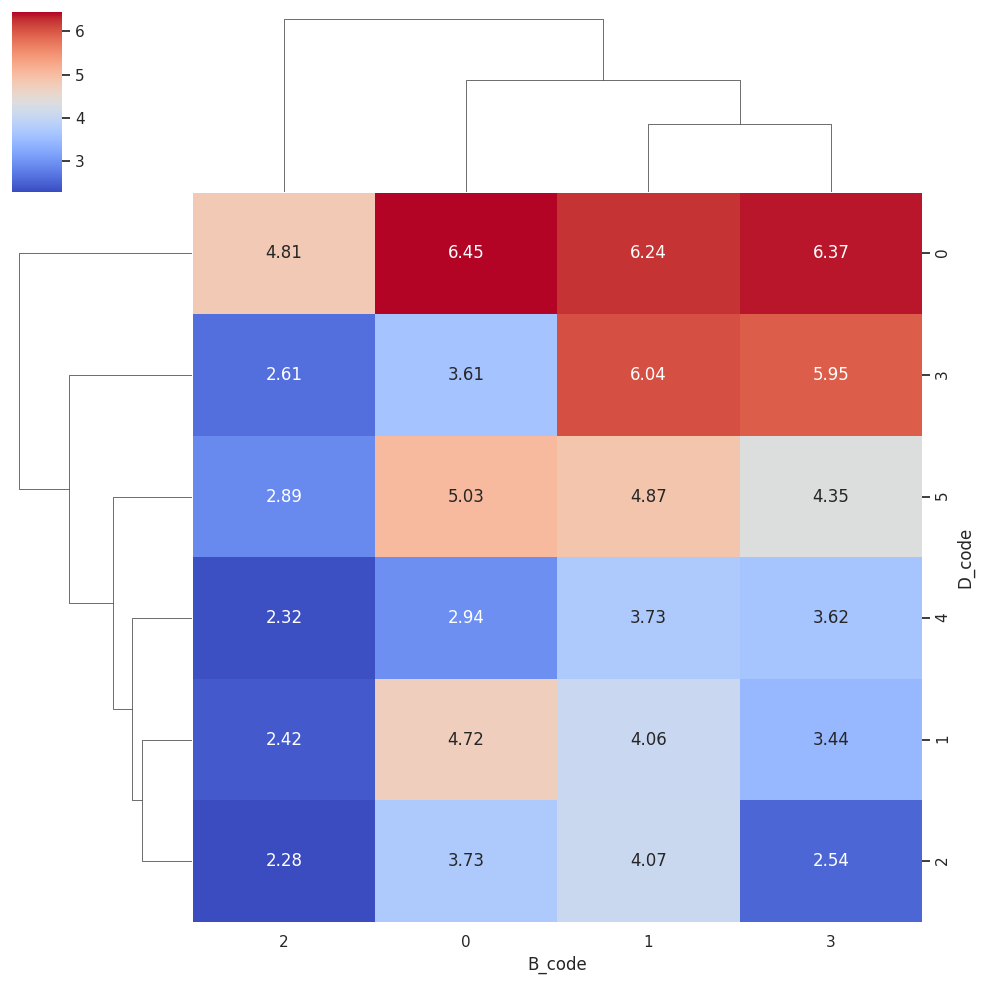

In [259]:
plt.figure(figsize=(10, 10))
sns.clustermap(compute_matrix("D", "B", "mean"), annot=True, fmt=".2f", cmap='coolwarm')

<Figure size 1000x1000 with 0 Axes>

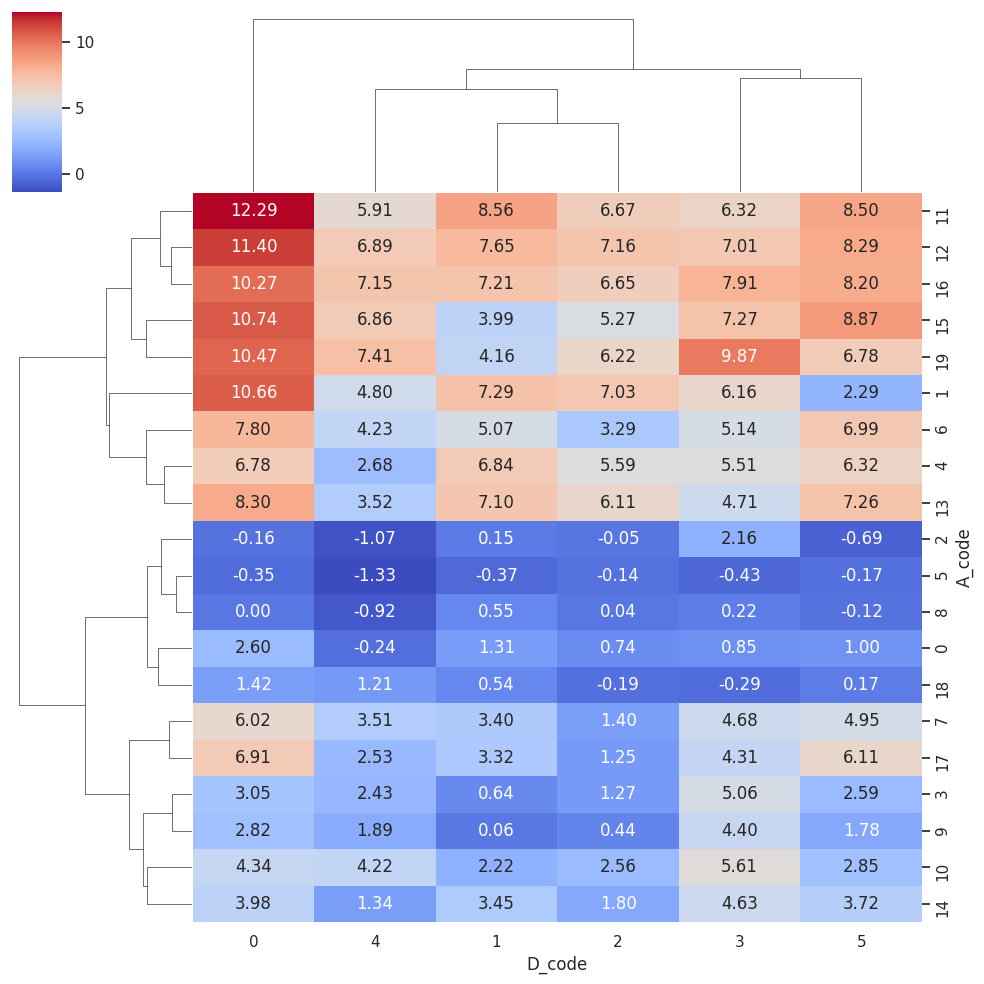

In [261]:
plt.figure(figsize=(10, 10))
sns.clustermap(compute_matrix("A", "D", "mean"), annot=True, fmt=".2f", cmap='coolwarm')